### Twitter Sentiment Analysis using NLP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot

#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
#to see x and y axis clearly - else it would be black on black

### Load dataset

In [2]:
tweets_df = pd.read_csv('C:/Users\saras/Desktop/NLP/twitter_train.csv')
tweets_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

### Explore dataset

In [3]:
#Get more information about my dataframe
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [5]:
#Drop ID from df
tweets_df = tweets_df.drop(['id'], axis=1)

tweets_df.head()

label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation

<AxesSubplot:>

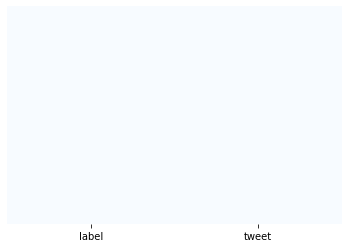

In [6]:
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")
#Plotting a heatmap for missing values - No missing values

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

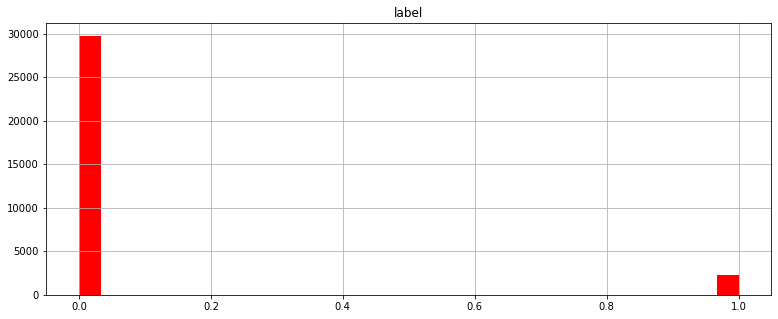

In [7]:
#plot a histogram of tweets
tweets_df.hist(bins=30, figsize=(13,5), color='r')

#only a small # of negative tweets

<AxesSubplot:xlabel='label', ylabel='count'>

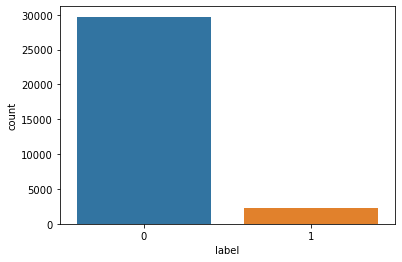

In [8]:
sns.countplot(x='label', data=tweets_df)
#simply drawing same histogram using seaborn

In [9]:
#Get length of tweets - maybe can use as an additional feature
tweets_df['length'] = tweets_df['tweet'].apply(len)


In [10]:
tweets_df

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

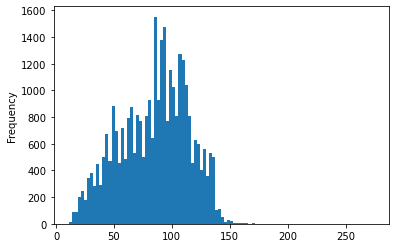

In [11]:
tweets_df['length'].plot(bins=100, kind='hist')
#trying to understand the distribution of length of tweets

In [12]:
tweets_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [13]:
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

#seeing what the smallest tweet is

'i love you '

In [14]:
#view message with the average length
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [15]:
#Create 2 separate dataframes for positive and negative tweets
positive = tweets_df[tweets_df['label']==0]

In [16]:
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [17]:
negative = tweets_df[tweets_df['label']==1]

In [18]:
negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

###  Plot wordcloud

In [19]:
#Create a list of all tweets
sentences = tweets_df['tweet'].tolist()

In [20]:
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [21]:
len(sentences)

31962

In [22]:
#Join all sentences into one string
sentences_as_one_string = " ".join(sentences)

In [23]:
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

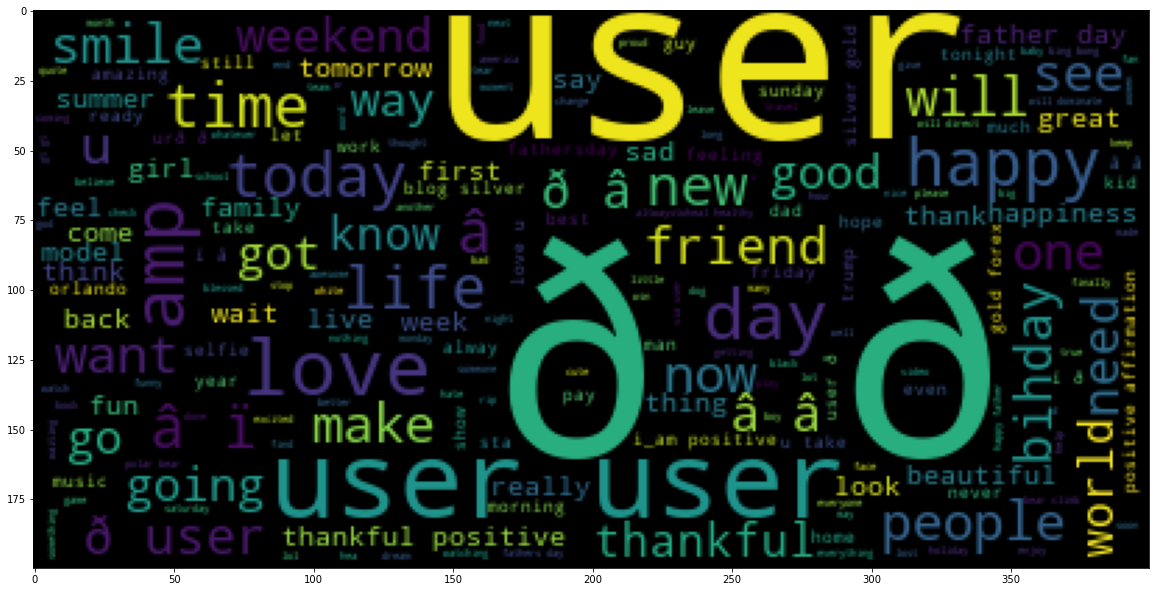

In [24]:
#!conda install -c conda-forge wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [25]:
#for negative sentences
#Create a list of all tweets
neg_sentences = negative['tweet'].tolist()
neg_sentences_as_one_string = " ".join(neg_sentences)

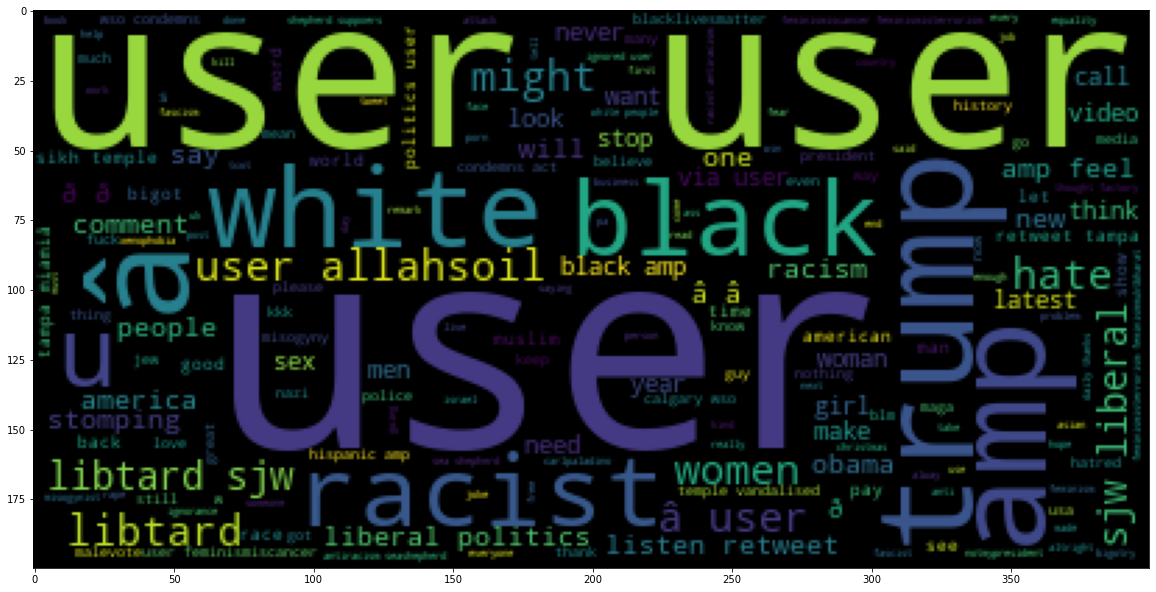

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sentences_as_one_string))

## Cleaning data - for learning purpose only

In [27]:
#Remove punctuations
import string


test = 'Good afternoon, having a tough day :(, hopefully I get better soon!!!'

#test_punc_removed = [   for char in test if char not in string.punctuation ] -- didnt work - check later why

test_punc_removed = []

for char in test:
    if char not in string.punctuation:
        test_punc_removed.append(char)
    
test_punc_removed = ''.join(test_punc_removed)

test_punc_removed




'Good afternoon having a tough day  hopefully I get better soon'

In [28]:
#Remove stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
test_punc_removed_nostop = [word for word in test_punc_removed.split() if word.lower() not in stopwords.words('english')]

In [31]:
test_punc_removed_nostop

['Good', 'afternoon', 'tough', 'day', 'hopefully', 'get', 'better', 'soon']

In [32]:
#Count Vectorizer or tokenization
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
sample_data = ['This is the first paper.', 'This paper is the second paper.', 'And this is the third paper', 'Is this the first paper?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [34]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'paper', 'second', 'the', 'third', 'this']


In [35]:
print(X.toarray())

[[0 1 1 1 0 1 0 1]
 [0 0 1 2 1 1 0 1]
 [1 0 1 1 0 1 1 1]
 [0 1 1 1 0 1 0 1]]


## Cleaning up of actual data - remove punctuations stop words and perform countvectorization

In [36]:
##define pipeline to remove punctuation and stopwords
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_clean
    

In [37]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [38]:
print(tweets_df_clean[5]) #show the cleaned tweet at index position 5

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [39]:
print(tweets_df['tweet'][5]) #show original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)

tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet'].to_numpy())

In [41]:
tweets_countvectorizer.shape

(31962, 47386)

In [42]:
#setup variables
X = tweets_countvectorizer
y = tweets_df['label']


## Train model using Naive Bayes'

In [43]:
X.shape

(31962, 47386)

In [44]:
y.shape

(31962,)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

## Assess model performance

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
y_predict_test = NB_classifier.predict(X_test) # make predictions for unseen test data

In [50]:
cm = confusion_matrix(y_test, y_predict_test) #create a confusion matrix for predictions against ground truth

<AxesSubplot:>

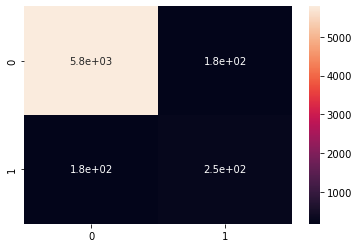

In [51]:
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5965
           1       0.58      0.58      0.58       428

    accuracy                           0.94      6393
   macro avg       0.77      0.77      0.77      6393
weighted avg       0.94      0.94      0.94      6393



## Model can be improved - need to try other classification algos and look for a better accuracy